# Etapa 1:  Entendimento do negócio

Como primeira etapa, vamos entender do que se trata o negócio, e quais os objetivos. 

Este é um problema de concessão de cartões de crédito, publicado no [Kaggle](https://www.kaggle.com/), uma plataforma que promove desafios de ciência de dados, oferecendo prêmios em dinheiro para os melhores colocados. O link original está [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).  
  
Essa é uma base de proponentes de cartão de crédito, nosso objetivo é construir um modelo preditivo para identificar o risco de inadimplência (tipicamente definida pela ocorrência de um atraso maior ou igual a 90 em um horizonte de 12 meses) através de variáveis que podem ser observadas na data da avaliação do crédito (tipicamente quando o cliente solicita o cartão).

Atividades:

- Objetivos do negócio
Note que o objetivo aqui é que o modelo sirva o mutuário (o cliente) para que avalie suas próprias decisões, e não a instituição de crédito.
- Objetivos da modelagem
O objetivo está bem definido: desenvolver o melhor modelo preditivo de modo a auxiliar o mutuário a tomar suas próprias decisões referentes a crédito.
  
Nessa etapa também se avalia a situação da empresa/segmento/assunto de modo a se entender o tamanho do público, relevância, problemas presentes e todos os detalhes do processo gerador do fenômeno em questão, e portanto dos dados.

Também é nessa etapa que se constrói um planejamento do projeto.

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [29]:
df = pd.read_csv('demo01.csv')
df

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
16646,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
16647,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True
16648,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True


- As variáveis



| Variable Name            | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| sexo| M = 'Masculino'; F = 'Feminino' |M/F|
| posse_de_veiculo| Y = 'possui'; N = 'não possui' |Y/N|
| posse_de_imovel| Y = 'possui'; N = 'não possui' |Y/N|
| qtd_filhos| Quantidade de filhos |inteiro|
| tipo_renda|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| educacao| Nível de educação (ex: secundário, superior etc) |texto|
| estado_civil | Estado civil (ex: solteiro, casado etc)| texto |
| tipo_residencia | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| idade | idade em anos |inteiro|
| tempo de emprego | tempo de emprego em anos |inteiro|
| possui_celular | Indica se possui celular (1 = sim, 0 = não) |binária|
| possui_fone_comercial | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| possui_fone | Indica se possui telefone (1 = sim, 0 = não) |binária|
| possui_email | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| qt_pessoas_residencia | quantidade de pessoas na residência |inteiro|
| **mau** | indicadora de mau pagador (True = mau, False = bom) |binária|

- Tipos de dados de cada variável

In [30]:
df.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

- Quantidade de missings

In [31]:
df.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

- Distribuição da variável resposta (mau)

In [32]:
print(df['mau'].value_counts())

False    16260
True       390
Name: mau, dtype: int64


In [33]:
print(df['mau'].value_counts(normalize = True))

False    0.976577
True     0.023423
Name: mau, dtype: float64


#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [34]:
# 1.

metadados = pd.DataFrame({'variavel': df.columns, 'tipo de dado': df.dtypes})
metadados

,variavel,tipo de dado
sexo,sexo,object
posse_de_veiculo,posse_de_veiculo,object
posse_de_imovel,posse_de_imovel,object
qtd_filhos,qtd_filhos,int64
tipo_renda,tipo_renda,object
educacao,educacao,object
estado_civil,estado_civil,object
tipo_residencia,tipo_residencia,object
idade,idade,float64
tempo_emprego,tempo_emprego,float64


In [35]:
qtd_cat = []
for item in df.columns:
    lista = df[item].nunique()
    qtd_cat.append(lista)
print(qtd_cat)

[2, 2, 2, 8, 5, 5, 5, 6, 5298, 3005, 1, 2, 2, 2, 9, 2]


In [36]:
metadados['qtd_categorias'] = qtd_cat

metadados.reset_index(drop = True, inplace = True)

metadados

,variavel,tipo de dado,qtd_categorias
0,sexo,object,2
1,posse_de_veiculo,object,2
2,posse_de_imovel,object,2
3,qtd_filhos,int64,8
4,tipo_renda,object,5
5,educacao,object,5
6,estado_civil,object,5
7,tipo_residencia,object,6
8,idade,float64,5298
9,tempo_emprego,float64,3005


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [37]:
df['sexo'].unique()

array(['M', 'F'], dtype=object)

In [38]:
df.sexo = df.sexo.map({'M': 0, 'F': 1}) 

In [39]:
df.mau = df.mau.astype(int) 

In [40]:
df['posse_de_veiculo'].unique()

array(['Y', 'N'], dtype=object)

In [41]:
df.posse_de_veiculo = df.posse_de_veiculo.map({'N': 0, 'Y': 1})

In [42]:
df['posse_de_imovel'].unique()

array(['Y', 'N'], dtype=object)

In [43]:
df.posse_de_imovel = df.posse_de_imovel.map({'N': 0, 'Y': 1})

In [44]:
df.drop(['tipo_renda', 'tipo_residencia'], axis = 1, inplace = True)

In [45]:
df['educacao'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [46]:
df['estado_civil'].unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Widow',
       'Separated'], dtype=object)

In [47]:
df_dummies = pd.get_dummies(df, columns = ['educacao', 'estado_civil']) 

In [48]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    16650 non-null  int64  
 1   posse_de_veiculo                        16650 non-null  int64  
 2   posse_de_imovel                         16650 non-null  int64  
 3   qtd_filhos                              16650 non-null  int64  
 4   idade                                   16650 non-null  float64
 5   tempo_emprego                           16650 non-null  float64
 6   possui_celular                          16650 non-null  int64  
 7   possui_fone_comercial                   16650 non-null  int64  
 8   possui_fone                             16650 non-null  int64  
 9   possui_email                            16650 non-null  int64  
 10  qt_pessoas_residencia                   16650 non-null  fl

In [49]:
df_dummies

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Academic degree,educacao_Higher education,educacao_Incomplete higher,educacao_Lower secondary,educacao_Secondary / secondary special,estado_civil_Civil marriage,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow
0,0,1,1,0,58.832877,3.106849,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,1,0,1,0,52.356164,8.358904,1,0,1,1,...,0,0,0,0,1,0,0,0,1,0
2,1,0,1,0,52.356164,8.358904,1,0,1,1,...,0,0,0,0,1,0,0,0,1,0
3,0,1,1,0,46.224658,2.106849,1,1,1,1,...,0,1,0,0,0,0,1,0,0,0
4,1,1,0,0,29.230137,3.021918,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,1,0,1,0,54.109589,9.884932,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
16646,1,0,1,0,43.389041,7.380822,1,1,1,0,...,0,0,0,0,1,0,1,0,0,0
16647,0,1,1,0,30.005479,9.800000,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
16648,0,1,1,0,30.005479,9.800000,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0


In [50]:
df_dummies.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau',
       'educacao_Academic degree', 'educacao_Higher education',
       'educacao_Incomplete higher', 'educacao_Lower secondary',
       'educacao_Secondary / secondary special', 'estado_civil_Civil marriage',
       'estado_civil_Married', 'estado_civil_Separated',
       'estado_civil_Single / not married', 'estado_civil_Widow'],
      dtype='object')

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [51]:
df_dummies[['possui_email', 'posse_de_veiculo', 'mau']].groupby(['possui_email', 'posse_de_veiculo']).count()

mau
possui_email posse_de_veiculo      
0            0                 9341
             1                 5829
1            0                  837
             1                  643

A variável posse_de_veiculo a meu ver é mais significativa para prever o mau = 1

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [52]:
df_dummies.to_csv('df_dummies.csv', index = False)

In [53]:
df = pd.read_csv('df_dummies.csv')
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Academic degree,educacao_Higher education,educacao_Incomplete higher,educacao_Lower secondary,educacao_Secondary / secondary special,estado_civil_Civil marriage,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow
0,0,1,1,0,58.832877,3.106849,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,1,0,1,0,52.356164,8.358904,1,0,1,1,...,0,0,0,0,1,0,0,0,1,0
2,1,0,1,0,52.356164,8.358904,1,0,1,1,...,0,0,0,0,1,0,0,0,1,0
3,0,1,1,0,46.224658,2.106849,1,1,1,1,...,0,1,0,0,0,0,1,0,0,0
4,1,1,0,0,29.230137,3.021918,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [54]:
y = df.mau

In [55]:
X = df.drop('mau', axis = 1)

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)



1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

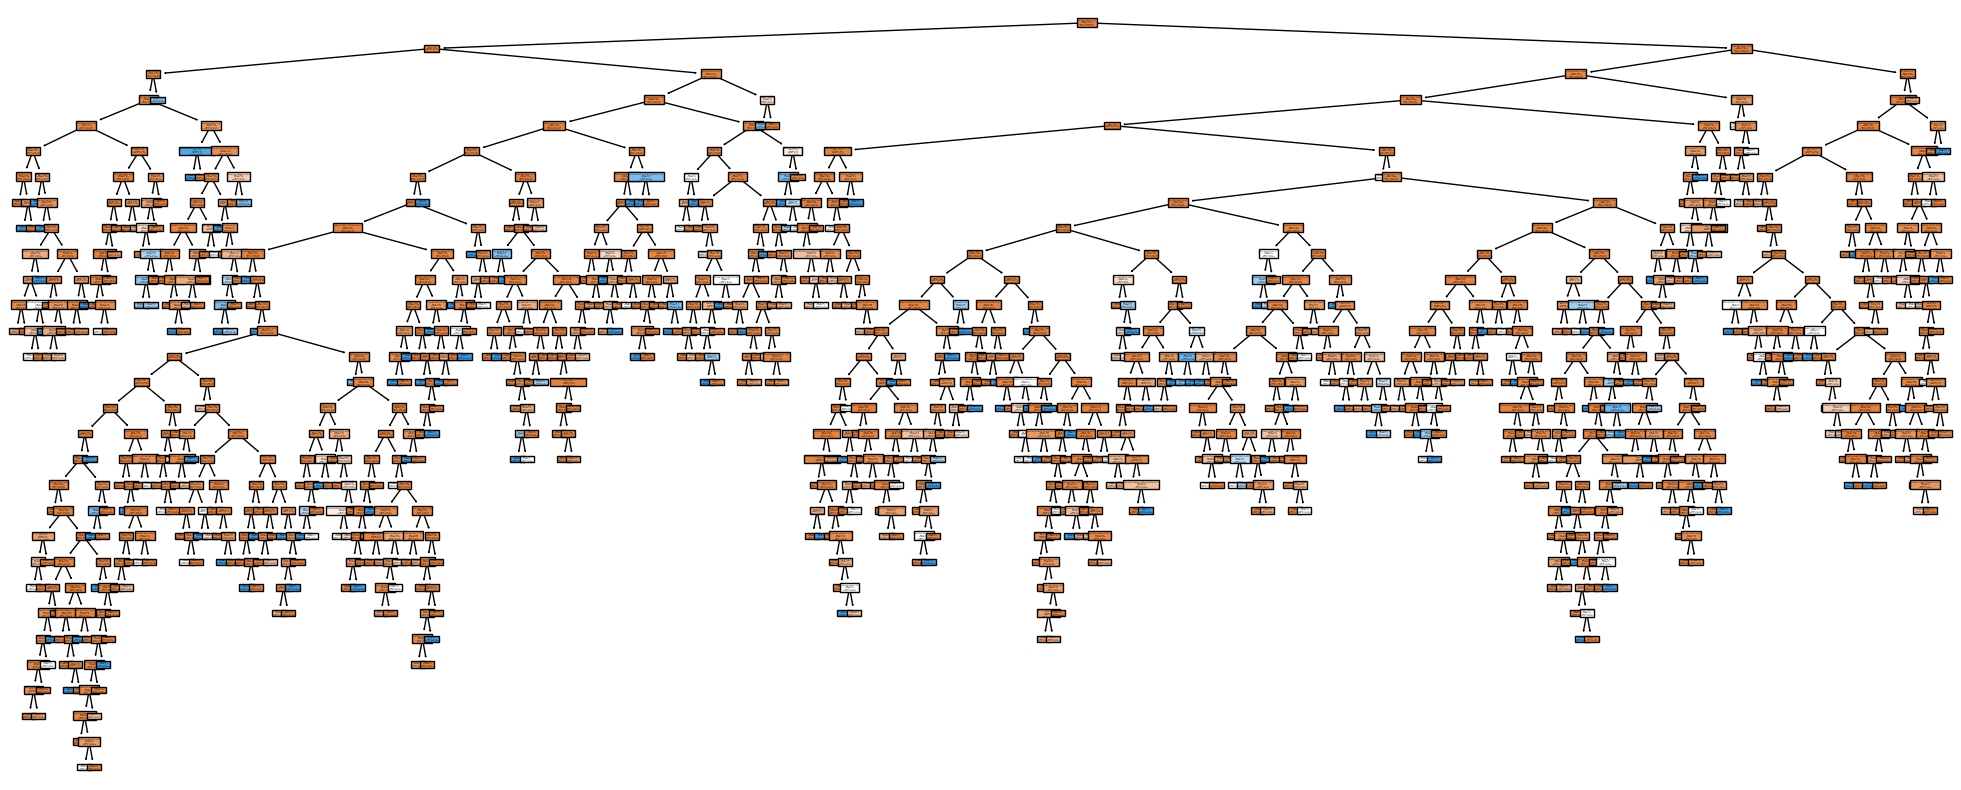

In [57]:
clf = DecisionTreeClassifier()

clf = clf.fit(X,y)

plt.figure(figsize=(25, 10))

plot_tree(clf,
          filled=True,
          class_names=['aprovados', 'reprovados'],
          feature_names=X.columns);

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


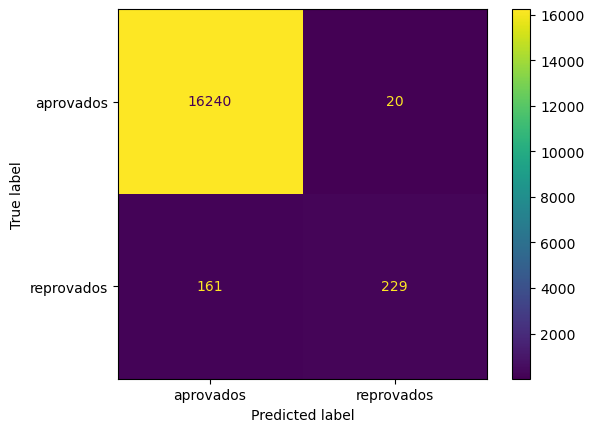

In [58]:
plot_confusion_matrix(clf, X, y, display_labels=['aprovados', 'reprovados']);

In [59]:
predict = clf.predict(X)

In [60]:
acurácia_treinamento = accuracy_score(y, predict)
acurácia_treinamento

0.9891291291291291

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [62]:
clf = DecisionTreeClassifier() 

In [63]:
# 1) 
clf = clf.fit(X_train,y_train)

In [64]:
y_chapeu_teste = clf.predict(X_test)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


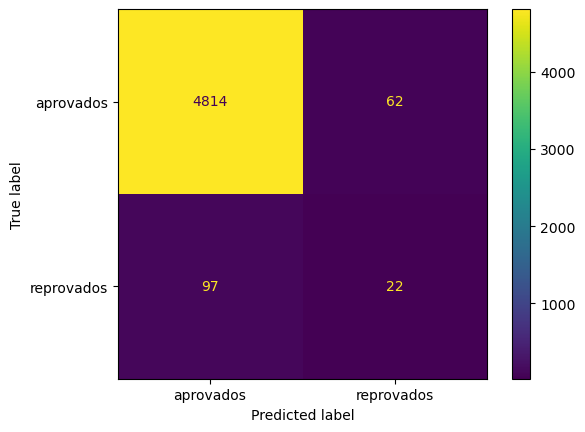

In [65]:
# 2) 
plot_confusion_matrix(clf, X_test, y_test, display_labels=['aprovados', 'reprovados']);

In [66]:
# 3)
acurácia_teste = accuracy_score(y_test, y_chapeu_teste)

print(f'''Acurácia treinamento: {acurácia_treinamento}
Acurácia teste: {acurácia_teste}''')

Acurácia treinamento: 0.9891291291291291
Acurácia teste: 0.9681681681681682


### 4)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [68]:
clf = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 5, random_state=123) 

In [69]:
clf = clf.fit(X_train,y_train)

In [70]:
y_chapeu_teste = clf.predict(X_test)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


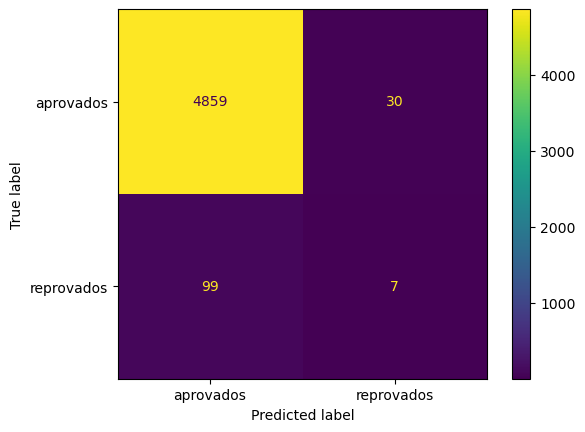

In [71]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=['aprovados', 'reprovados']);

In [72]:
accuracy_score(y_test, y_chapeu_teste)

0.9741741741741742

4. qual a proporção de proponentes foram classificados como 'maus'?

A proporção de proponentes classificados como 'maus' é de 8  

5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [73]:
y = df.mau.replace(1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100) 

clf = DecisionTreeClassifier() 

clf = clf.fit(X_train,y_train)

pred_2 = clf.predict(X_test)

accuracy_score(y_test, pred_2) 

1.0